### Similarity Matrix

In [11]:
import pandas as pd
kinetics = pd.read_csv('./data/overall_distances_kinetics.csv', index_col=0)
kinetics = kinetics.round(0)
kinetics

,0,1,2,3,4,5,6,7,8,9
0,0.0,369.0,850.0,400.0,960.0,158.0,2408.0,385.0,326.0,5342.0
1,369.0,0.0,615.0,521.0,890.0,441.0,2482.0,689.0,294.0,5385.0
2,850.0,615.0,0.0,927.0,970.0,884.0,2578.0,1031.0,822.0,5435.0
3,400.0,521.0,927.0,0.0,1026.0,493.0,2072.0,642.0,407.0,5031.0
4,960.0,890.0,970.0,1026.0,0.0,991.0,2575.0,1121.0,933.0,5433.0
5,158.0,441.0,884.0,493.0,991.0,0.0,2454.0,280.0,413.0,5377.0
6,2408.0,2482.0,2578.0,2072.0,2575.0,2454.0,0.0,2447.0,2345.0,3047.0
7,385.0,689.0,1031.0,642.0,1121.0,280.0,2447.0,0.0,665.0,5370.0
8,326.0,294.0,822.0,407.0,933.0,413.0,2345.0,665.0,0.0,5229.0
9,5342.0,5385.0,5435.0,5031.0,5433.0,5377.0,3047.0,5370.0,5229.0,0.0


### Annotations

In [13]:
anno = pd.read_csv('./data/annotations.csv')
anno

,clones,populations
0,Clone 0,HSC_MPP
1,Clone 1,MEMP
2,Clone 2,Megakaryocyte
3,Clone 3,Mast cell
4,Clone 4,Early Erythroid
5,Clone 5,Mid Erythroid
6,Clone 6,Late Erythroid
7,Clone 7,Neutrophil-myeloid progenitor
8,Clone 8,DC
9,Clone 9,Monocyte precursor


### Topology Graph & Cell Counts

In [1]:
from clonaltrans import pl, utils
paga, array_total = utils.get_topo_obs('./data/')

Topology graph loaded (11, 11).
Input cell data (num_timepoints 3, num_clones 10, num_populations 11) loaded.
Day 0 has been added. Input data shape: torch.Size([4, 10, 11])
Background reference cells generated. Input data shape: torch.Size([4, 11, 11])


In [2]:
paga

tensor([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')

In [3]:
array_total[0]

tensor([[ 85.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 75.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 68.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 65.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 60.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 55.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 45.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [550.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]],
       device='cuda:0')

### Transition Matrix K

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import torch
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
# torch.set_printoptions(sci_mode=False, )
np.set_printoptions(suppress=True)

from clonaltrans import pl, utils
import os

%load_ext autoreload
%autoreload 2

In [13]:
path = './examples/2Layers/EKMTime4LR001Epo1000LogN.pt'
model = torch.load(path)
device = torch.device(f"cuda:{model.config.gpu}")

In [17]:
print (model.ode_func)

ODEBlock(
  encode (clone, pop, hidden) = torch.Size([11, 11, 16]), 
  encode_bias=True, 
  decode (clone, hidden, pop) = torch.Size([11, 16, 11]), 
  decode_bias=True
  (activation): Softplus(beta=1, threshold=20)
)


In [21]:
model.matrix_K = model.get_matrix_K()

In [22]:
K = model.matrix_K

In [23]:
anno = pd.read_csv('./data/annotations.csv')

In [24]:
transition_K = pd.DataFrame(
    index=anno['populations'].values, 
    columns=anno['populations'].values, 
    data=K.detach().cpu().numpy()[8]
)

In [25]:
model.matrix_K[8, 9, 9]

tensor(1.0668e-05, device='cuda:0', grad_fn=<SelectBackward0>)

In [28]:
model.matrix_K[8, 9, 9] - model.ode_func.K2[8, 9]

tensor(2.6336e-07, device='cuda:0', grad_fn=<SubBackward0>)

In [29]:
model.ode_func.K1[8, 9, 9]

tensor(-0.0005, device='cuda:0', grad_fn=<SelectBackward0>)

In [26]:
model.ode_func.K2[8, 9]

tensor(1.0405e-05, device='cuda:0', grad_fn=<SelectBackward0>)

In [27]:
torch.square(model.ode_func.K1)[8, 9, 9]

tensor(2.6336e-07, device='cuda:0', grad_fn=<SelectBackward0>)

<AxesSubplot: >

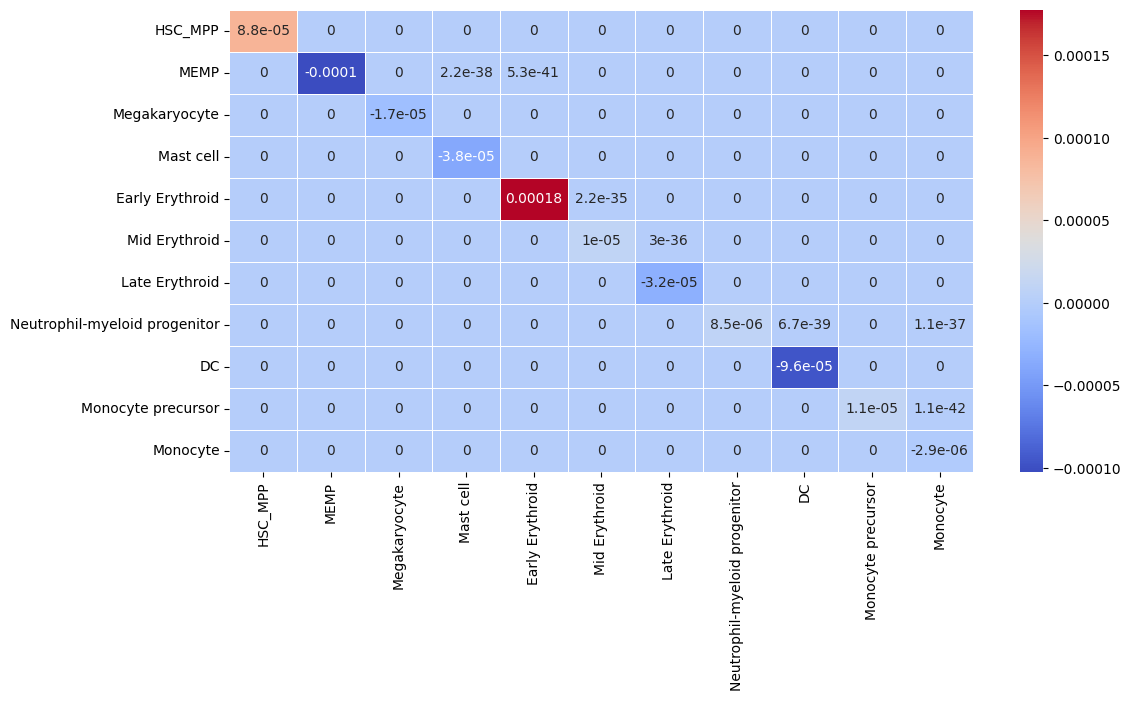

In [30]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.heatmap(transition_K, annot=True, linewidths=.5, cmap='coolwarm', ax=axes)

### Naive Example of NODEs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import torch
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
from torch import nn
from torchdiffeq import odeint_adjoint as odeint
# from torchdiffeq import odeint

torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
MSE = nn.MSELoss(reduction='none')
SmoothL1 = nn.SmoothL1Loss(reduction='mean', beta=1.0)

class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.linear = nn.Linear(3, 3)
        self.alpha = nn.parameter.Parameter(torch.tensor([1.0, 1.0, 1.0]), requires_grad=True)

    def forward(self, t, y):
        dydt = -self.alpha * y # y' = -alpha * y, y(t) = exp(-alpha * t) * y0
        # dydt = self.linear(y)
        return dydt

class ODEBlock(nn.Module):
    def __init__(self):
        super(ODEBlock, self).__init__()
        self.ode_func = ODEFunc()

    def forward(self, y0, t):
        # y0: (1, input_dim)
        # t: (n_points,)
        y_pred = odeint(self.ode_func, y0, t, method='dopri5')
        return y_pred
    
    @torch.no_grad()
    def evaluate(self, y0, t_eval):
        # y0: (1, input_dim)
        # t_eval: (n_points,)
        y_eval = self.forward(y0, t_eval)
        return y_eval[-1]

def train_model(model, optimizer, y0, y_observed, t_observed, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()

        y_pred = model(y0, t_observed)
        loss = SmoothL1(y_pred, y_observed)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

def eval_model(model, y0, t_eval):
    model.eval()
    y_pred = model.evaluate(y0, t_eval)
    print(f"y_pred={y_pred.detach().cpu().numpy()}")

device = torch.device("cuda:3")
model = ODEBlock().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 1000

y0 = torch.tensor([1.0, 2.0, 3.0]).to(device)
y_observed = torch.tensor([[1.0, 2.0, 3.0], [2.0, 4.0, 6.0], [3.0, 8.0, 15.0]]).to(device)
t_observed = torch.tensor([3.0, 10.0, 17.0]).to(device)

train_model(model, optimizer, y0, y_observed, t_observed, num_epochs)
eval_model(model, y0, torch.tensor([3.0, 17.0]).to(device))
eval_model(model, y0, torch.tensor([3.0, 10.0]).to(device))
eval_model(model, y0, torch.tensor([3.0, 5.0]).to(device))

Epoch 0, Loss: 3.8883
Epoch 100, Loss: 0.0616
Epoch 200, Loss: 0.0302
Epoch 300, Loss: 0.0302
Epoch 400, Loss: 0.0302
Epoch 500, Loss: 0.0302
Epoch 600, Loss: 0.0302
Epoch 700, Loss: 0.0302
Epoch 800, Loss: 0.0302
Epoch 900, Loss: 0.0302
y_pred=[ 3.0706701  8.        14.848471 ]
y_pred=[1.1738279 2.4380276 3.7700245]


In [ ]:
model.ode_func.alpha

Parameter containing:
tensor([-0.0801, -0.0990, -0.1142], device='cuda:3', requires_grad=True)

In [ ]:
torch.exp(-model.ode_func.alpha * 2) * y0

tensor([1.1738, 2.4380, 3.7700], device='cuda:3', grad_fn=<MulBackward0>)

### Origianl Input Data

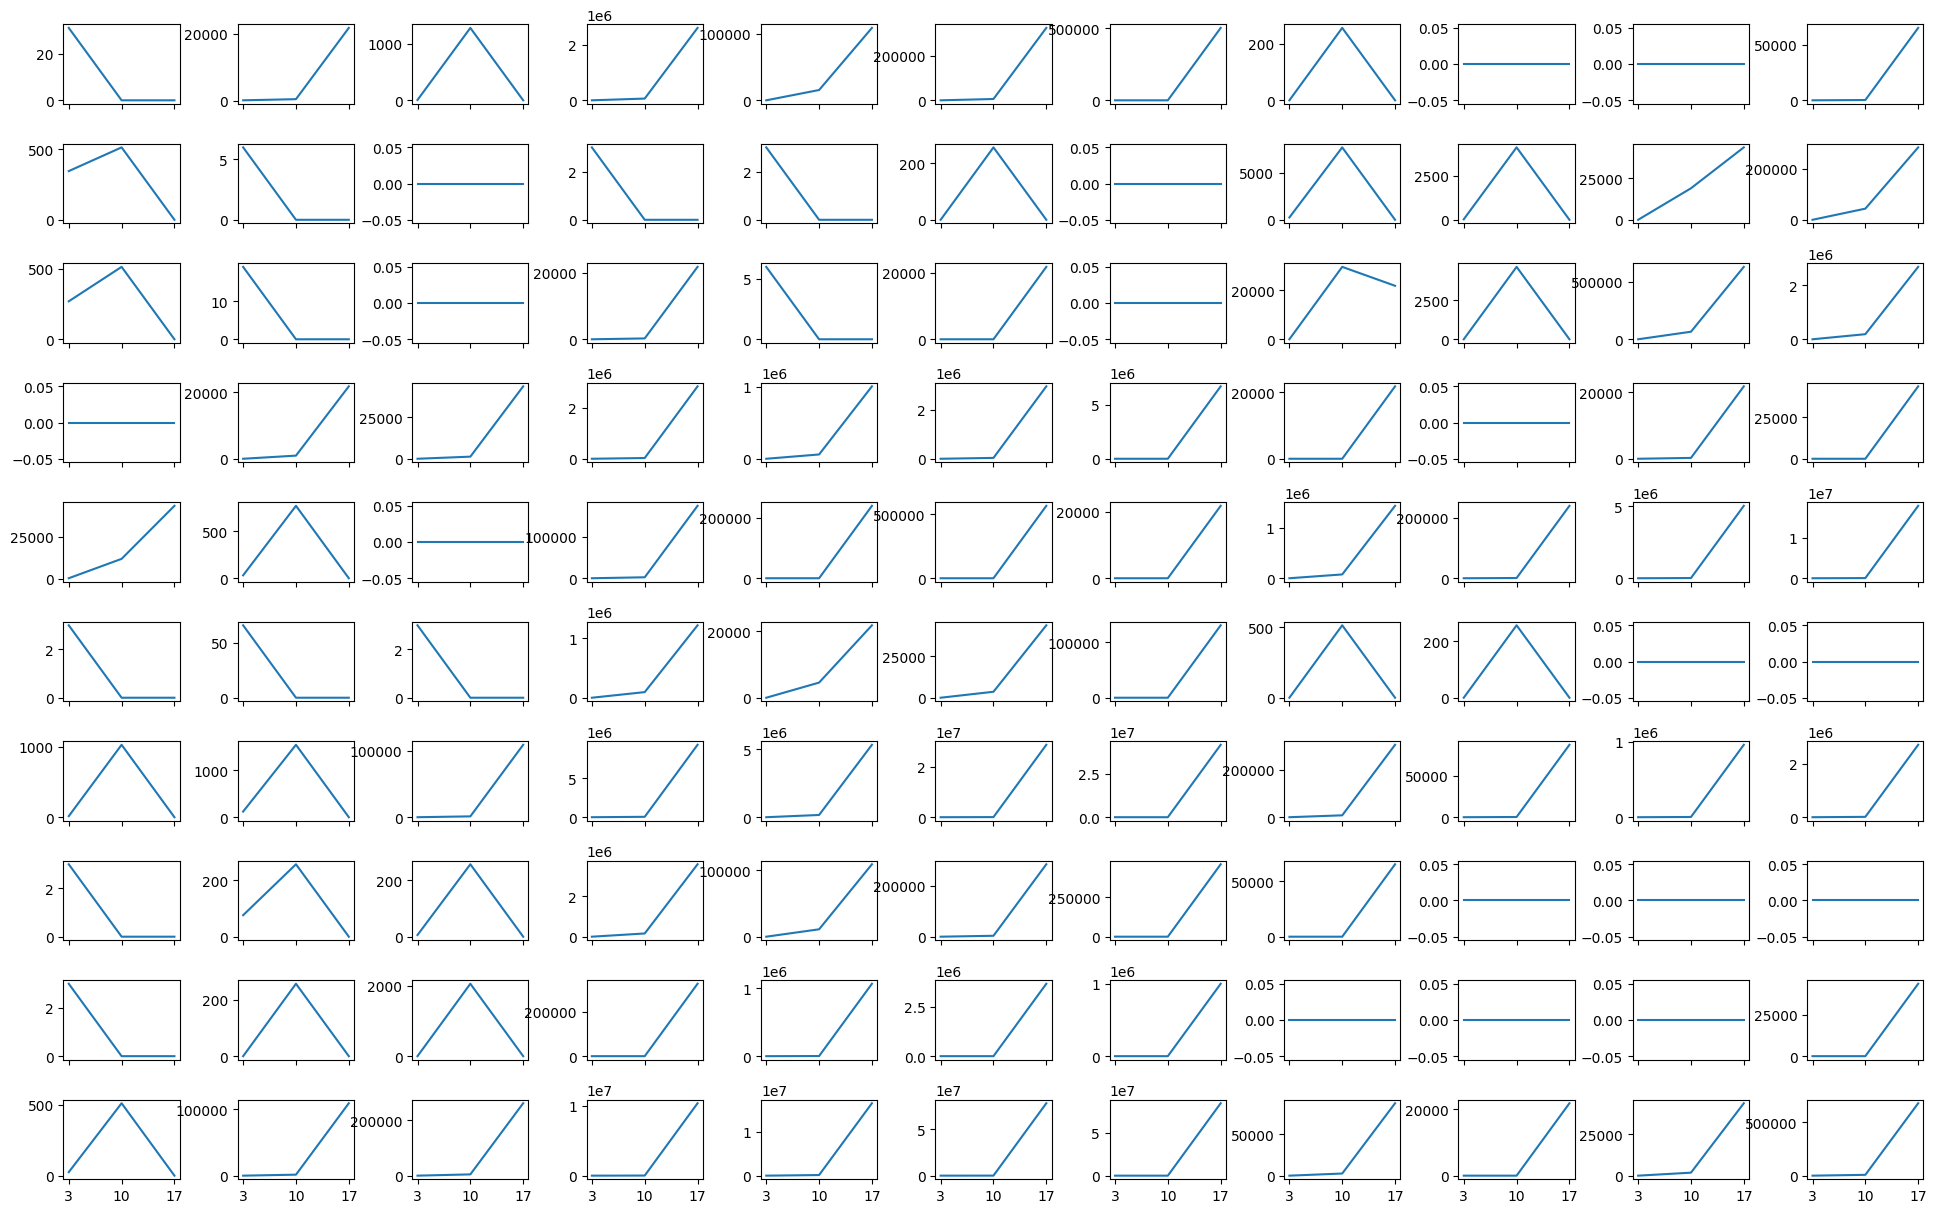

In [ ]:
array = np.loadtxt("./data/kinetics_array_correction_factor.txt")
array_ori = array.reshape(array.shape[0], array.shape[1] // 11, 11)

fig, ax = plt.subplots(10, 11, figsize=(24, 15), sharex=True)

for i in range(10):
    for j in range(11):
        ax[i][j].plot([3, 10, 17], array_ori[i, :, j])
        ax[i][j].set_xticks([3, 10, 17]) 

fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)

In [ ]:
array_ori = torch.swapaxes(torch.tensor(array_ori), 0, 1)
array_ori.shape

torch.Size([3, 10, 11])